# Scikit_Learn 맛보기
### Iris 분류 - 결정트리 , 서포트 벡터머신(SVM), 로지스틱 회귀

#### 1. 데이터 전처리

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
iris.keys()
# sklearn 에서 제공하는 데이터 셋으 공통된 특징. 데이터 타겟. 타겟 네임즈. 디스크립션. 피쳐 네임즈, 공통적 컬럼 이름. 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# 무슨얘기냐면 #데이터 셋 로드 및 페치 계열. 페치는 데이터를 다운로드 받는 구조. 로드는 데이터가 많지 않아서 바로 넣어줘

# Feature data - numpy dimensinal array
iris.data[:5]    # 딕셔너리라면 iris['data'] 이렇게 써야되. 그래서 쓰기 편하게 bunch(js의 오브젝트)로 쓸수있게 되어있어. 
                 # 마치 딕셔너리 타입같은데 사용할게는 ~~.target ~~.data로 쓸수 있게 오브젝트타입 바꿔줘.

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
type(iris.data), iris.data.shape

(numpy.ndarray, (150, 4))

In [7]:
# Feature name #주로 X값으로 많이쓰여. 입력값
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# for 반복문 활용
feature_names = []
for name in iris.feature_names:
    feature_names.append(name[:-5])

feature_names

['sepal length', 'sepal width', 'petal length', 'petal width']

In [15]:
# map 과 lambda 활용
feature_names = list(map(lambda s: s[:-5], iris.feature_names))
feature_names

['sepal length', 'sepal width', 'petal length', 'petal width']

In [10]:
# 리스트 표현식 (lsit comprehension)
feature_names = [name[:-5] for name in iris.feature_names]
feature_names

['sepal length', 'sepal width', 'petal length', 'petal width']

In [11]:
s = 'sepal length (cm)'
s[:-5]

'sepal length'

In [12]:
"10 20 30".split()

['10', '20', '30']

##### 인풋 어케 집어넣지?

a, b, c = map(int, input().split())

In [13]:
# Target data
iris.target[:5]

array([0, 0, 0, 0, 0])

In [14]:
# df.head(3)

NameError: name 'df' is not defined

In [ ]:
import numpy as np
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [ ]:
iris.target_names   # class 0번이 세토사 쪼매난놈.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
import pandas as pd 
df = pd.DataFrame(iris.data, columns=feature_names)
df['target'] = iris.target
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# 설명 
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [19]:
df.describe()
# df.describe와 차이

,sepal length,sepal width,petal length,petal width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# 위처럼 보면 안되고
df.groupby('target').describe()

sepal length                                             sepal width  \
              count   mean       std  min    25%  50%  75%  max       count   
target                                                                        
0              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8        50.0   
1              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0        50.0   
2              50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9        50.0   

               ... petal length      petal width                             \
         mean  ...          75%  max       count   mean       std  min  25%   
target         ...                                                            
0       3.428  ...        1.575  1.9        50.0  0.246  0.105386  0.1  0.2   
1       2.770  ...        4.600  5.1        50.0  1.326  0.197753  1.0  1.2   
2       2.974  ...        5.875  6.9        50.0  2.026  0.274650  1.4  1.8   

                       
        50%  75%  max  
target                 
0       0.2  0.3  0.6  
1       1.3  1.5  1.8  
2       2.0  2.3  2.5  

[3 rows x 32 columns]

In [ ]:
df.groupby('target').agg(['mean'], ['std'])

,sepal length,sepal width,petal length,petal width
,mean,mean,mean,mean
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


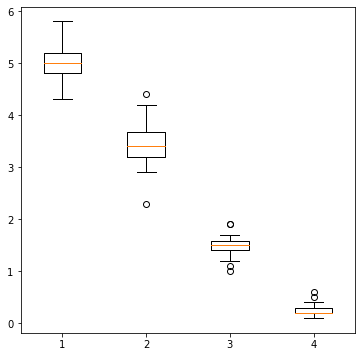

In [ ]:
import matplotlib.pyplot as plt 
setosa = df[df.target == 0].iloc[:, : -1]
plt.figure(figsize=(6,6))
plt.boxplot(setosa)
plt.show()

In [ ]:
### 마지막 수업내용 추가
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

### 2. 학습과 테스트 데이터로 분리 

In [ ]:
# 튜플언패킹. 파이썬에서만 가능해 왼쪽R 오른쪽 l  보통의 프로그램 랭귀지에서는 왼쪽에 여러가지 데이터 올수없어.
# 파이썬으 튜플 언패킹 주목할 것.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=2021     #test_size 안주면 25% 디폴트
) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# 120개 훈련, 30개는 테스트 로 
# 사이킷 런에서 X에 들어오는 데이터는 무조건 2차원 데이터, y는 1차원 데이터 차원이 달라서 . 2차원 이상 대문자. 1차원은 소문자로 표현관례국룰

((120, 4), (30, 4), (120,), (30,))

In [ ]:
# de facto standard  스페인어. 사실상 표준. 
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([36, 40, 44], dtype=int64))

In [ ]:
# y 값을 균일하게 뽑아주려면 #stratify=iris.target 타켓에 있는 분류비율맞춰서 해줘.
# 랜덤스테이트 2021

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.2, random_state=2021
)
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([40, 40, 40], dtype=int64))

In [ ]:
# 랜덤시드 고정. 주로 2021로 쓰신다
np.random.seed(2021)
import numpy as np
np.random.randint(0, 101, 10)

array([85, 57,  0, 94, 86, 44, 62, 91, 29, 21])

### 3.학습

- Decision Tree(결정 트리)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 모델 생성 - 객체 생성
dtc = DecisionTreeClassifier(random_state=2021)

In [ ]:
# 학습(훈련)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

### 4. 예측

In [ ]:
pred_dt = dtc.predict(X_test)

In [ ]:
pred_dt

array([0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2,
       0, 2, 1, 0, 1, 1, 2, 0])

In [ ]:
res = pd.DataFrame({'y': y_test, 'DT': pred_dt})
res.head()
# 3번데이터 틀린것 확인 

,y,DT
0,0,0
1,1,1
2,1,2
3,2,2
4,0,0


### 5. 평가

In [21]:
 import accuracy_score

SyntaxError: invalid syntax (<ipython-input-21-dad37361db64>, line 1)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred_dt)
print(f'정확도(DT): {acc:.4f}')

정확도(DT): 0.9000


In [ ]:
# 4,5번을 한번에 수행 
dtc.score(X_test, y_test)

0.9

* support Vector Machine(SVM)

In [ ]:
# 3)

from sklearn.svm import SVC
svc = SVC(random_state=2021)
svc.fit(X_train, y_train)


SVC(random_state=2021)

In [ ]:
# 4) 예측
pred_sv = svc.predict(X_test)

In [ ]:
# 둘의 비교 으의가 뭐야? 둘다 사이킷런 아님?
accuracy_score(y_test, pred_sv), svc.score(X_test, y_test)

(0.9, 0.9)

* Logistic Regression

In [ ]:
# 3)모델생성 및 학습
# 회귀를 분류에 사용할 수 있는 이유는 결과가 이산적으로 나오기 때문. 곡선의 그림 시그모이드 
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(max_iter=500, random_state=2021)
lrc.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=2021)

In [ ]:
# 4 ) 예측
pred_lr = lrc.predict(X_test)

In [ ]:
# 5 ) 평가 
accuracy_score(y_test, pred_lr), lrc.score(X_test, y_test)

(0.9333333333333333, 0.9333333333333333)

* 3가지 모델 결과 비교

In [ ]:
res['SV'] = pred_sv
res['LR'] = pred_lr
res.head(10)

,y,DT,SV,LR
0,0,0,0,0
1,1,1,1,1
2,1,2,1,1
3,2,2,2,2
4,0,0,0,0
5,1,1,1,1
6,0,0,0,0
7,1,1,1,1
8,2,2,2,2
9,0,0,0,0


In [ ]:
# 참고사항 f-string

In [ ]:
a = 1
b= 1.0
c = '문자열'
print(a, b, c)

1 1.0 문자열


In [ ]:
# f 스트링. 포맷 #용재 질문
print('정수:', a, ',실수:', b,',', c, '"1"')

정수: 1 ,실수: 1.0 , 문자열 "1"


In [ ]:
print(f'정수: {a}, 실수: {b}, {c}: "1"')
# ''  안에 문자열과, 숫자를 한번에 집어 넣어도 된다고.

정수: 1, 실수: 1.0, 문자열: "1"


In [ ]:
print(f'정수:{a:03d}, 실수: {b:.2f}, {c:10s}: "1"')

정수:001, 실수: 1.00, 문자열       : "1"
